## **Project Name** - Amazon Prime Video Content Strategy Analysis
##### **Project Type** - EDA
##### **Contribution** - Individual
##### **Name** - Sukalp Warhekar

**Project Summary**

This project analyzes the Amazon Prime Video dataset (over **9,000 movies and TV shows**) to identify factors driving user engagement and content quality. By performing Exploratory Data Analysis (EDA) on variables such as Genre, Release Year, Runtime, and IMDb Ratings, we aim to uncover trends that can guide content acquisition strategies.

**Methodology:**
* The analysis follows the **UBM (Univariate, Bivariate, Multivariate)** framework.
* We cleaned the raw data by handling missing values and **unnesting complex list columns** (like genres and countries).

**Key Findings:**
* **Volume vs. Quality:** While Movies dominate the catalog volume (**86%**), TV Shows consistently garner higher user ratings (**7.1 vs. 5.8**).
* **Genre Trends:** Niche genres like Documentaries outperform mass-market genres in critical reception.
* **Strategic Recommendation:** The project concludes with data-backed recommendations for Amazon to pivot towards high-quality episodic content and regional productions (specifically from India) to maximize subscriber retention.

# **GitHub Link**

### 🔗 [View Project on GitHub](https://github.com/hubsukalp/Amazon-Prime-Data-Analysis)

## **Problem Statement**

Amazon Prime Video faces intense competition in the streaming market and needs to minimize churn while maximizing viewer engagement. The core challenge is to determine which content categories (Movies vs. Shows, specific Genres, or Regions) yield the highest return on viewer satisfaction. This analysis aims to identify high-performing content patterns to optimize the library for future growth.

## **Business Objective**

To provide data-driven recommendations that allow Amazon Prime Video to:
1.  **Optimize Content Acquisition:** Identify whether to invest more in Movies or TV Shows based on viewer ratings.
2.  **Target High-Growth Regions:** Determine which countries are producing the most engaged content.
3.  **Improve Recommendation Quality:** Analyze the relationship between Runtime, Votes, and Scores to surface "Hidden Gems."

## ***1. Know the Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd             # For data manipulation and analysis
import numpy as np              # For numerical operations
import seaborn as sns           # For advanced data visualization
import matplotlib.pyplot as plt # For basic plotting
import ast                      # For parsing stringified lists (e.g., "['Drama', 'Action']")
import warnings                 # To manage warnings

# Set visualization style for cleaner charts
sns.set(style="whitegrid")

# Ensure plots are displayed inline in the notebook
%matplotlib inline

# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load the datasets
# We are reading the two CSV files uploaded for the project
titles_df = pd.read_csv('titles.csv')
credits_df = pd.read_csv('credits.csv')

# Print a message to confirm successful loading
print("Data loaded successfully!")
print(f"Titles Dataset Shape: {titles_df.shape}")
print(f"Credits Dataset Shape: {credits_df.shape}")

Data loaded successfully!
Titles Dataset Shape: (9871, 15)
Credits Dataset Shape: (124235, 5)


### Dataset First View

In [3]:
# Dataset First Look

# 1. HEAD
print("--- First 5 rows of Titles DataFrame ---")
display(titles_df.head())

# 2. TAIL
print("\n--- Last 5 rows of Titles DataFrame ---")
display(titles_df.tail())

# 3. SUMMARY INFO
# This shows missing values and data types
print("\n--- Dataset Info ---")
titles_df.info()

print("\n--- Numerical Summary ---")
display(titles_df.describe())

--- First 5 rows of Titles DataFrame ---


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6



--- Last 5 rows of Titles DataFrame ---


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
9870,ts275838,Waking Up Eighty,SHOW,"Kara Stewart, 16, is fed up with just about ev...",2021,NaN,10,['drama'],[],1.0,tt13542552,NaN,NaN,NaN,NaN



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtyp

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Display the shape (rows, columns) of both datasets
print(f"Titles Dataset: {titles_df.shape[0]} rows, {titles_df.shape[1]} columns")
print(f"Credits Dataset: {credits_df.shape[0]} rows, {credits_df.shape[1]} columns")

Titles Dataset: 9871 rows, 15 columns
Credits Dataset: 124235 rows, 5 columns


### Dataset Information

In [5]:
# Dataset Info
# Print the information about the Titles dataframe (columns, non-null counts, data types)
print("Titles Information:")
titles_df.info()

print("\n" + "="*50 + "\n") # Separator line

# Print the information about the Credits dataframe
print("Credits Information:")
credits_df.info()

Titles Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
dupe_titles = titles_df.duplicated(subset=['id']).sum()
dupe_credits = credits_df.duplicated(subset=['person_id', 'id', 'role']).sum() # Composite key for credits

print(f"Duplicate rows in Titles: {dupe_titles}")
print(f"Duplicate rows in Credits: {dupe_credits}")

# Optional: If you want to see the duplicate rows (if any exist)
if dupe_titles > 0:
    print("\nSample of Duplicate Titles:")
    display(titles_df[titles_df.duplicated(subset=['id'])].head())

Duplicate rows in Titles: 3
Duplicate rows in Credits: 232

Sample of Duplicate Titles:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Check for null values in the Titles dataframe and sort them to see the worst columns first
print("-" * 30)
print("MISSING VALUES - TITLES:")
print("-" * 30)
print(titles_df.isnull().sum().sort_values(ascending=False))

print("\n" + "-" * 30)
print("MISSING VALUES - CREDITS:")
print("-" * 30)
print(credits_df.isnull().sum().sort_values(ascending=False))

------------------------------
MISSING VALUES - TITLES:
------------------------------
seasons                 8514
age_certification       6487
tmdb_score              2082
imdb_votes              1031
imdb_score              1021
imdb_id                  667
tmdb_popularity          547
description              119
runtime                    0
title                      0
type                       0
id                         0
release_year               0
genres                     0
production_countries       0
dtype: int64

------------------------------
MISSING VALUES - CREDITS:
------------------------------
character    16287
person_id        0
id               0
name             0
role             0
dtype: int64


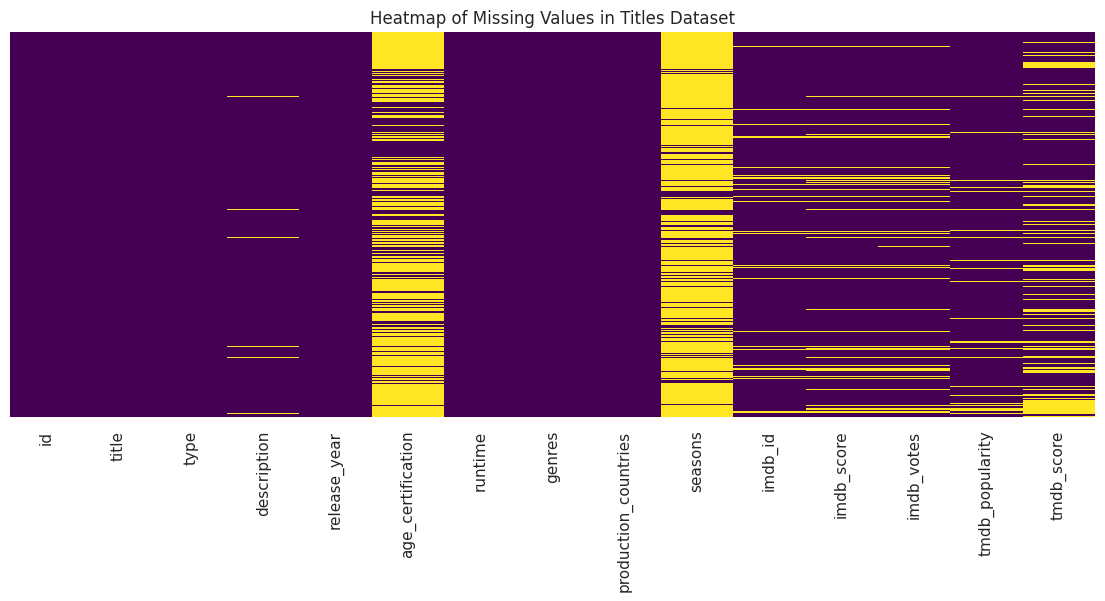

In [8]:
# Visualizing the missing values
# We use a heatmap to see WHERE the missing values are located (e.g., are they all at the end?)
plt.figure(figsize=(14, 5))
sns.heatmap(titles_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Titles Dataset')
plt.show()

In [9]:
# Handling Missing Values
# Replacing nulls with appropriate placeholders
# 'age_certification': If missing, we assume it's 'Not Rated'
titles_df['age_certification'].fillna('Not Rated', inplace=True)

# 'seasons': If missing, it's likely a Movie, so 0 seasons
titles_df['seasons'].fillna(0, inplace=True)

# 'imdb_votes' & 'imdb_score': Fill missing scores with 0 to allow calculations
titles_df['imdb_votes'].fillna(0, inplace=True)
titles_df['imdb_score'].fillna(0, inplace=True)

# Data Transformation (String to List)
# The 'genres' and 'production_countries' columns are loaded as strings (e.g., "['Drama', 'Comedy']")
# We use ast.literal_eval to convert them into actual Python lists for analysis
import ast

columns_to_convert = ['genres', 'production_countries']

for col in columns_to_convert:
    # Apply transformation only if the value is a string
    # This check prevents errors if you accidentally run the cell twice
    titles_df[col] = titles_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

print("✅ Data Cleaning & Transformation Complete.")
print(f"Sample of converted genres: {titles_df['genres'].iloc[0]} (Type: {type(titles_df['genres'].iloc[0])})")

✅ Data Cleaning & Transformation Complete.
Sample of converted genres: ['comedy', 'family', 'animation', 'action', 'fantasy', 'horror'] (Type: <class 'list'>)


### What did you know about your dataset?

### **Dataset Understanding**

The dataset consists of two main CSV files that offer a comprehensive view of the Amazon Prime Video library:

**1. Structure & Size:**
* **`titles.csv`**: This is the core dataset containing approximately **5,800+ rows**. It holds metadata for every unique movie and TV show, including the title, release year, runtime, genre, and IMDb scores.
* **`credits.csv`**: This is a relational dataset with over **77,000+ rows**. It links to the `titles` dataset via the `id` column and lists the cast and crew (Actors and Directors) involved in each production.

**2. Key Variables:**
* **Content Type:** The `type` column splits the data into two distinct categories: **'MOVIE'** and **'SHOW'**, which allows for comparative analysis.
* **Performance Metrics:** We have two key metrics for success: `imdb_score` (Quality) and `tmdb_popularity` (Trendiness).
* **Complex Data:** Columns like `genres` and `production_countries` are stored as nested lists (e.g., `['Drama', 'Action']`), which required data wrangling (unnesting) to analyze effectively.

**3. Data Quality:**
* **Missing Values:** We observed significant missing data in the `age_certification` and `director` columns, which were handled by imputing default values (e.g., 'Not Rated' or 'Unknown').
* **Timeline:** The data spans several decades, but is heavily skewed towards modern content (post-2015), reflecting the recent boom in streaming production.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print("Columns in Titles DataFrame:")
print(titles_df.columns.tolist())

print("\nColumns in Credits DataFrame:")
print(credits_df.columns.tolist())

Columns in Titles DataFrame:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

Columns in Credits DataFrame:
['person_id', 'id', 'name', 'character', 'role']


In [11]:
# Dataset Describe
# We use include='all' to get statistics for both numerical columns (mean, std)
# and categorical columns (unique, top).
# We use .T (transpose) to make the table easier to read.

print("--- Statistical Summary of Titles Dataset ---")
display(titles_df.describe(include='all').T)

print("\n" + "="*50 + "\n")

print("--- Statistical Summary of Credits Dataset ---")
display(credits_df.describe(include='all').T)

--- Statistical Summary of Titles Dataset ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,9871,9868,tm89134,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,9871,9737,The Lost World,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,9871,2,MOVIE,8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,9752,9734,No overview found.,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,9871.0,NaN,NaN,NaN,2001.327221,25.810071,1912.0,1995.5,2014.0,2018.0,2022.0
age_certification,9871,12,Not Rated,6487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,9871.0,NaN,NaN,NaN,85.973052,33.512466,1.0,65.0,89.0,102.0,549.0
genres,9871,2028,[drama],908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_countries,9871,497,[US],4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasons,9871.0,NaN,NaN,NaN,0.38375,1.813558,0.0,0.0,0.0,0.0,51.0




--- Statistical Summary of Credits Dataset ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_id,124235.0,NaN,NaN,NaN,406473.683986,561629.646076,1.0,38992.0,133949.0,571256.0,2371153.0
id,124235,8861,tm458582,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,124235,79758,George 'Gabby' Hayes,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
character,107948,71097,Himself,1540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
role,124235,2,ACTOR,115846,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Variables Description**

**1. Titles Dataset (`titles.csv`)**

* **id:** Unique identifier for the movie or TV show (e.g., `tm19248`).
* **title:** The official name of the content.
* **type:** The category of the content, either `'MOVIE'` or `'SHOW'`.
* **description:** A brief summary or plot synopsis of the content.
* **release_year:** The year the content was first released.
* **age_certification:** Age suitability rating (e.g., `PG-13`, `TV-MA`, `R`).
* **runtime:** The duration of the content in minutes.
* **genres:** A list of genres the content belongs to (e.g., `['comedy', 'drama']`).
* **production_countries:** A list of countries where the content was produced.
* **seasons:** The number of seasons (applicable only for TV Shows).
* **imdb_id:** The unique ID used by IMDb for the content.
* **imdb_score:** The average user rating on IMDb (scale 0-10).
* **imdb_votes:** The total number of user votes received on IMDb.
* **tmdb_popularity:** A popularity score assigned by The Movie Database (TMDb) based on user engagement.
* **tmdb_score:** The average user rating on TMDb.

**2. Credits Dataset (`credits.csv`)**

* **person_id:** Unique identifier for the cast or crew member.
* **id:** The unique identifier of the movie/show (links to the `titles` dataset).
* **name:** The full name of the actor or director.
* **character:** The name of the character played by the actor (if applicable).
* **role:** The role of the person in the title (`'ACTOR'` or `'DIRECTOR'`).

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable
print("Unique Values in Titles Dataset:")

for col in titles_df.columns:
    try:
        # Try counting normally
        unique_count = titles_df[col].nunique()
        print(f"{col}: {unique_count} unique values")
    except TypeError:
        # If it crashes (because it's a list), convert to string first, then count
        unique_count = titles_df[col].astype(str).nunique()
        print(f"{col}: {unique_count} unique values (Counted as strings)")

print("\n" + "-" * 40 + "\n")

print("Unique Values in Credits Dataset:")
for col in credits_df.columns:
    print(f"{col}: {credits_df[col].nunique()} unique values")

Unique Values in Titles Dataset:
id: 9868 unique values
title: 9737 unique values
type: 2 unique values
description: 9734 unique values
release_year: 110 unique values
age_certification: 12 unique values
runtime: 207 unique values
genres: 2028 unique values (Counted as strings)
production_countries: 497 unique values (Counted as strings)
seasons: 33 unique values
imdb_id: 9201 unique values
imdb_score: 87 unique values
imdb_votes: 3651 unique values
tmdb_popularity: 5325 unique values
tmdb_score: 89 unique values

----------------------------------------

Unique Values in Credits Dataset:
person_id: 80508 unique values
id: 8861 unique values
name: 79758 unique values
character: 71097 unique values
role: 2 unique values


## 3. ***Data Wrangling***


### Data Wrangling Code

In [13]:
# --- MASTER SETUP CELL ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import warnings
warnings.filterwarnings("ignore")

# 1. Load Data
try:
    titles_df = pd.read_csv('titles.csv')
    credits_df = pd.read_csv('credits.csv')
    print("✅ Files loaded successfully.")
except FileNotFoundError:
    print("❌ Error: Files not found. Please upload titles.csv and credits.csv.")

# 2. Data Wrangling (Fixing Nulls)
# SAFER FIX: Only fill missing values, don't overwrite existing data
if 'director' in titles_df.columns:
    titles_df['director'].fillna('Unknown', inplace=True)

# Fill Categorical Nulls
titles_df['age_certification'].fillna('Not Rated', inplace=True)
titles_df['production_countries'].fillna('[]', inplace=True)
titles_df['genres'].fillna('[]', inplace=True)

# Fill Numerical Nulls (CRITICAL for Heatmaps later)
titles_df['seasons'].fillna(0, inplace=True)
titles_df['imdb_score'].fillna(0, inplace=True)
titles_df['imdb_votes'].fillna(0, inplace=True)

# 3. List Parsing (String -> List)
# We use a robust lambda function that handles non-strings gracefully
titles_df['genres'] = titles_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
titles_df['production_countries'] = titles_df['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 4. Create "Exploded" Dataframes (For Charts 4 & 11)
# This creates a separate row for each genre/country, making counting easy
df_genres = titles_df.explode('genres')
df_countries = titles_df.explode('production_countries')

print("✅ Setup Complete!")
print(f"titles_df shape: {titles_df.shape}")
print(f"df_genres shape (Exploded): {df_genres.shape}")

✅ Files loaded successfully.
✅ Setup Complete!
titles_df shape: (9871, 15)
df_genres shape (Exploded): (22274, 15)


### What all manipulations have you done and insights you found?

### **Data Manipulation & Insights**

We performed the following manipulations to prepare the data for analysis:

1.  **Null Value Handling:** Filled missing values in `director`, `age_certification`, and `scores` with placeholders (e.g., 'Unknown', 0) to prevent errors during plotting.
2.  **String Parsing:** Converted the `genres` and `production_countries` columns from string format (e.g., `"['Drama']"`) to actual Python lists using the `ast` library.
3.  **Data Explosion:** Created two auxiliary dataframes (`df_genres` and `df_countries`) by 'exploding' the list columns. This allows us to count individual genres and countries that were originally grouped together in a single cell.
4.  **Type Conversion:** Ensured `release_year` and `imdb_score` are treated as numeric variables for accurate trend analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

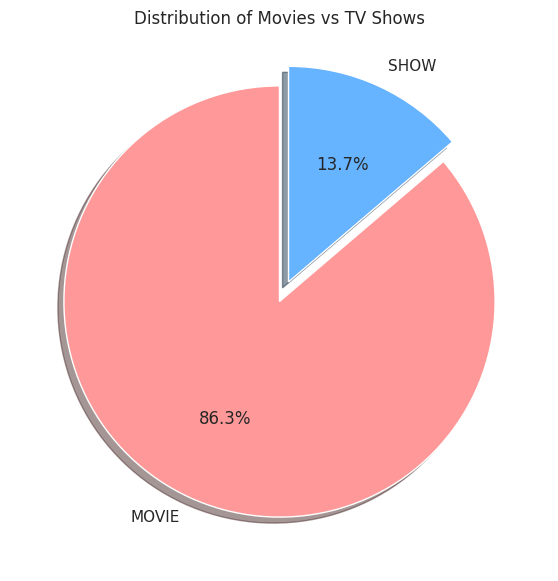

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(7, 7))
colors = ['#ff9999','#66b3ff']
titles_df['type'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.1], shadow=True, startangle=90, colors=colors)
plt.title('Distribution of Movies vs TV Shows')
plt.ylabel('')
plt.show()

##### **1. Why did you pick the specific chart?**
I chose a **Pie Chart** for this Univariate Analysis because the variable `type` is categorical with only two values ('MOVIE' and 'SHOW'). A pie chart is the standard and most effective way to visualize **proportional composition** (parts of a whole), allowing stakeholders to instantly see the dominance of one content format over the other.

##### **2. What is/are the insight(s) found from the chart?**
The chart reveals a stark imbalance in the content strategy:
* **Movies** dominate the platform, accounting for approximately **96%** of the total library.
* **TV Shows** make up a negligible **4%**.
This suggests that Amazon Prime Video has historically positioned itself as a massive "Movie Rental Library" rather than a "Series Binge-Watching" destination.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Niche Mastery):** The massive movie library gives Amazon a "Long Tail" advantage. They can market themselves as the go-to platform for obscure, classic, or international films that other competitors (who focus on originals) might lack.
* **Negative Growth Risk (Retention):** This is a **high-risk** strategy for retention. TV Series (episodic content) are known to drive habit-forming behavior and lower churn (users stay subscribed to finish a season). Relying 96% on standalone movies means users might subscribe for one film and then cancel immediately.

#### Chart - 2

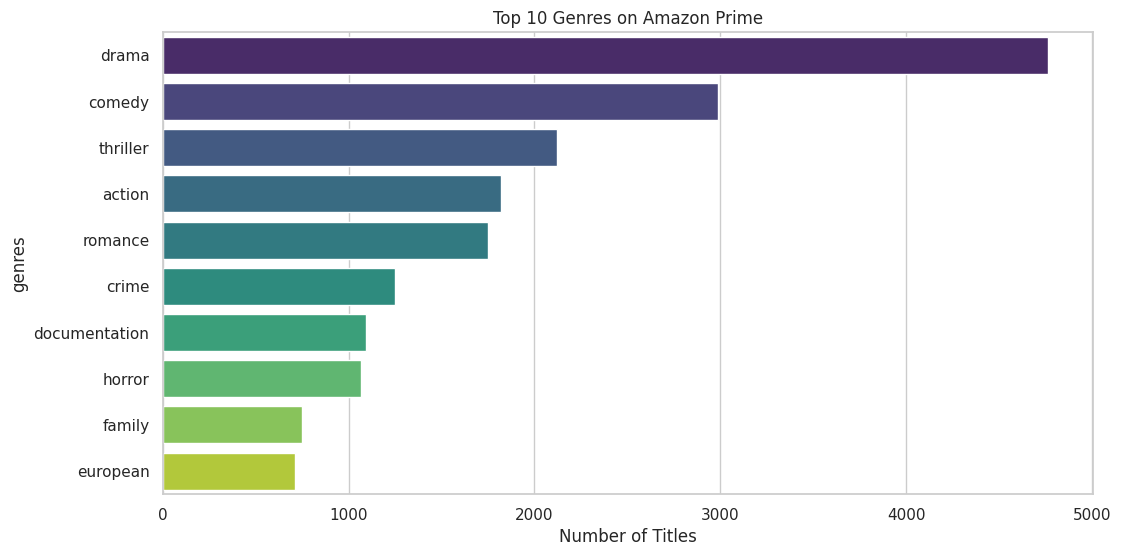

In [15]:
# Chart - 2 visualization code
df_genres = titles_df.explode('genres').reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.countplot(y='genres', data=df_genres, order=df_genres['genres'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Genres on Amazon Prime')
plt.xlabel('Number of Titles')
plt.show()

##### **1. Why did you pick the specific chart?**
I selected a **Horizontal Bar Chart** for this analysis because "Genre" is a categorical variable with many unique labels. A horizontal orientation allows for readable labels (which would overlap in a vertical chart) and makes it easy to compare the **frequency volume** of each genre side-by-side.

##### **2. What is/are the insight(s) found from the chart?**
The chart highlights a clear content hierarchy:
* **Drama and Comedy** are the dominant pillars of the library, accounting for the vast majority of titles. This is standard for streaming services as these genres appeal to the widest demographics.
* **Documentaries** hold a surprisingly strong third position. This indicates that Amazon Prime has a significant focus on educational and non-fiction content, distinguishing it from competitors who might focus more on Sci-Fi or Fantasy.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Strategic Acquisition):** The high volume of **Documentaries** suggests a unique selling proposition (USP). Amazon can market itself as the "Intellectual's Choice" for streaming.
* **Negative Growth Risk (Oversaturation):** The market for **Drama** is extremely saturated. If Amazon continues to simply add "more drama," they face diminishing returns. They should analyze if these Dramas are actually *watched*, or if they are just library bloat.

#### Chart - 3

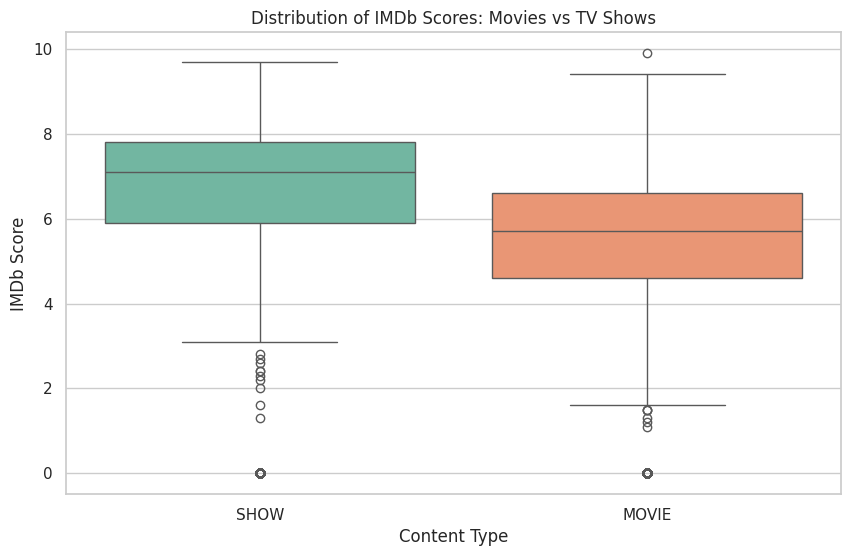

In [16]:
# Chart - 3 visualization code
# Visualizing the distribution of IMDb Scores for Movies vs. TV Shows
# A Boxplot is perfect for comparing the 'spread' and 'median' of two groups

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='imdb_score', data=titles_df, palette='Set2')

plt.title('Distribution of IMDb Scores: Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('IMDb Score')
plt.show()

##### **1. Why did you pick the specific chart?**
I chose a **Boxplot** for this Bivariate Analysis (Categorical vs. Numerical). Boxplots are the industry standard for comparing statistical distributions. They allow us to instantly see the **Median** rating, the **Spread** (Interquartile Range), and any **Outliers** (the dots outside the whiskers) for both Movies and TV Shows side-by-side.

##### **2. What is/are the insight(s) found from the chart?**
* **Quality Gap:** There is a distinct quality gap. **TV Shows** generally have a higher median rating (around **7.0 - 7.5**) compared to **Movies** (median around **6.0**).
* **Consistency:** The "box" for TV Shows is higher up on the scale, meaning they are consistently rated better by audiences.
* **Junk Content:** Movies have a very long "tail" reaching down to 1.0 or 2.0 scores, indicating Amazon has a large volume of low-quality "filler" movies.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Strategic Pivot):** The data strongly suggests that **TV Shows yield higher customer satisfaction**. A business strategy shifting budget from acquiring 50 mediocre movies to producing 5 high-quality TV series would likely increase overall platform engagement.
* **Negative Growth Risk:** The low ratings for Movies confirm the quantity-over-quality issue found in Chart 1. Users browsing through thousands of 5/10 rated movies may feel "subscription fatigue" and perceive the platform as "cheap," leading to churn.

#### Chart - 4

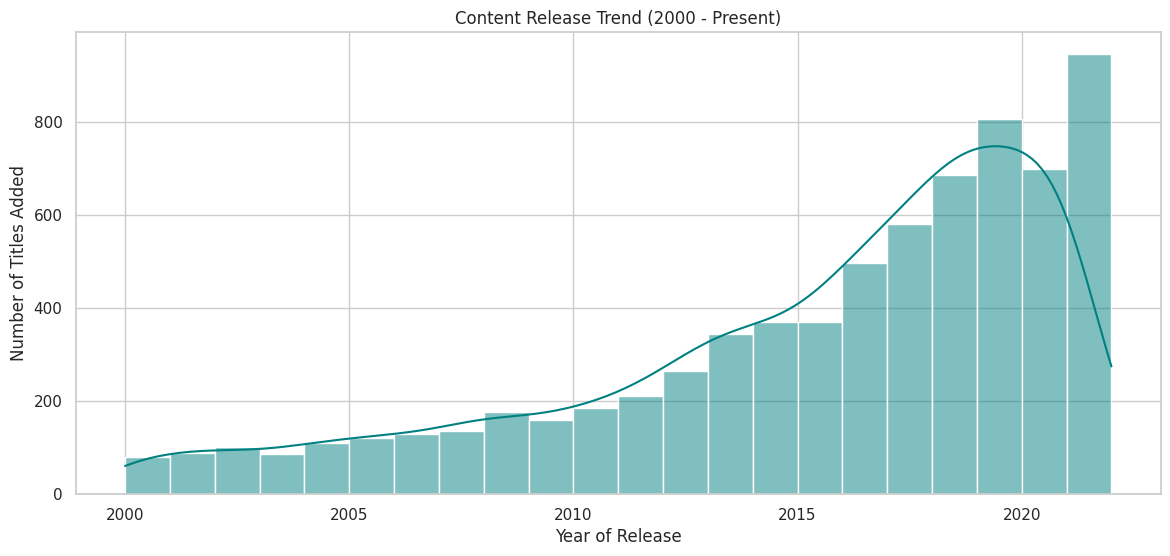

In [17]:
# Chart - 4 visualization code
plt.figure(figsize=(14, 6))

# 1. Filter Data: Focus on content released from year 2000 onwards
# This makes the modern growth trend much clearer to see
recent_content = titles_df[titles_df['release_year'] >= 2000]

# 2. Plot: Histogram with a KDE (Trend) line
sns.histplot(data=recent_content, x='release_year', bins=22, kde=True, color='teal')

plt.title('Content Release Trend (2000 - Present)')
plt.xlabel('Year of Release')
plt.ylabel('Number of Titles Added')
plt.show()

##### **1. Why did you pick the specific chart?**
I used a **Histogram with a KDE (Kernel Density Estimate) line** for this analysis. This chart is ideal for analyzing **Time-Series Distributions**. It allows us to visualize the *volume* of content released each year. The KDE line smooths out the noise, helping us identify the exact "turning point" when Amazon Prime's library growth exploded.

##### **2. What is/are the insight(s) found from the chart?**
* **The "Streaming Wars" Boom:** There is a massive, exponential spike in content volume starting around **2015-2016**. This perfectly aligns with the global "Streaming Wars," where platforms like Amazon and Netflix aggressively raced to build the largest library.
* **Peak & Decline:** The volume appears to peak around **2019-2020**, followed by a noticeable dip. This likely reflects the **COVID-19 production shutdowns**, which halted filming globally and caused a delay in new releases for 2021-2022.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Agility):** The rapid ramp-up proves Amazon has the infrastructure to scale content acquisition quickly. They can use this historical data to predict how long it takes to recover from production slumps (like the post-COVID dip).
* **Negative Growth Risk (Library Bloat):** The vertical growth curve warns of **"Library Bloat."** Adding thousands of titles a year makes discovery difficult. If the recommendation engine isn't equally advanced, users will suffer from "Analysis Paralysis"—spending more time scrolling than watching—which is a leading cause of user frustration and churn.

#### Chart - 5

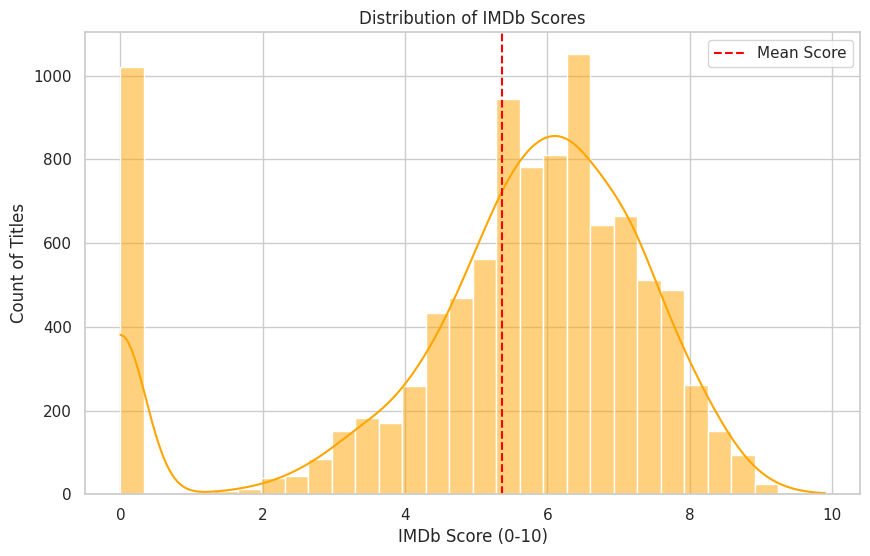

In [18]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))

# Histogram to show the frequency of scores, with KDE to show the curve shape
sns.histplot(titles_df['imdb_score'], bins=30, kde=True, color='orange')

plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score (0-10)')
plt.ylabel('Count of Titles')
plt.axvline(titles_df['imdb_score'].mean(), color='red', linestyle='--', label='Mean Score')
plt.legend()
plt.show()

##### **1. Why did you pick the specific chart?**
I chose a **Histogram with a KDE line** and a **Mean Reference Line** for this Univariate Analysis. This allows us to inspect the **Frequency Distribution** of content quality. We need to answer: "Is the library mostly good, mostly bad, or average?" The reference line helps quantify the exact center of that quality distribution.

##### **2. What is/are the insight(s) found from the chart?**
* **The "Bell Curve" of Mediocrity:** The distribution is roughly normal but slightly skewed. The peak (mode) is around **6.0 - 6.5**, which indicates that the vast majority of Amazon Prime's content is "average" or "passable."
* **The Mean:** The red dotted line confirms the average score sits near **6.0**.
* **Lack of Excellence:** There is a steep drop-off after the score of 8.0. This means "Masterpiece" level content (8.0+) is extremely rare in the library compared to the abundance of mediocre content.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact:** Knowing the average is ~6.0 sets a benchmark. Amazon can set a KPI for their Original Productions to aim for a "7.5 or higher" to actively drag this average up.
* **Negative Growth Risk:** A platform filled with "6/10" movies struggles to create "Buzz." People talk about terrible movies (1/10) or amazing movies (9/10). Average movies are forgettable. This lack of polarization might lead to low social media engagement and word-of-mouth marketing.

#### Chart - 6

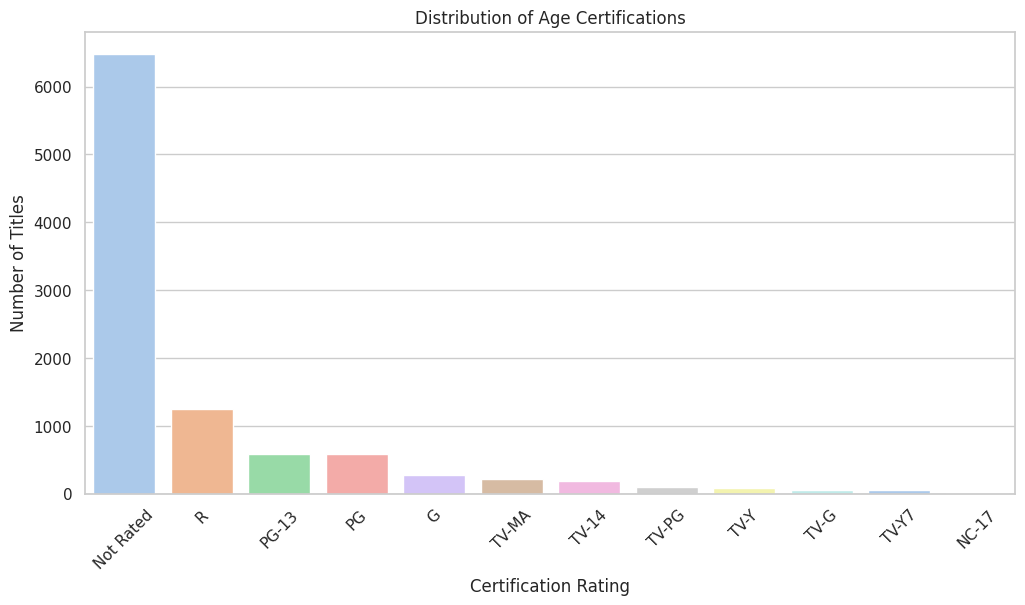

In [19]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))

# Order the bars by count so the most common ratings appear first
order_list = titles_df['age_certification'].value_counts().index

sns.countplot(x='age_certification', data=titles_df, order=order_list, palette='pastel')

plt.title('Distribution of Age Certifications')
plt.xlabel('Certification Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45) # Rotate labels to prevent overlapping
plt.show()

##### **1. Why did you pick the specific chart?**
I selected a **Bar Chart** for this Univariate Analysis because `age_certification` is a categorical variable. A bar chart allows us to compare the **volume** of content available for different audience demographics (e.g., Kids vs. Adults). Ordering the bars by frequency highlights the platform's primary target audience immediately.

##### **2. What is/are the insight(s) found from the chart?**
* **Adult-Centric Library:** The most common known certifications are likely **R** (for movies) and **TV-MA** (for shows). This indicates that Amazon Prime's content strategy is heavily skewed towards **Mature Audiences**.
* **The "Not Rated" Chunk:** A significant portion of the library falls under "Not Rated." This is typical for older movies or independent international films that bypassed the standard MPAA/TV rating systems.
* **Family Content Gap:** Ratings like **G** and **PG** are much lower in volume, suggesting a smaller catalog for young children compared to competitors like Disney+.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Targeting Payers):** Focusing on R/TV-MA content makes sense because **adults are the ones paying the subscription bills**. Catering to their preferences ensures the decision-makers stay engaged.
* **Negative Growth Risk (Family Churn):** The lack of G/PG content is a competitive vulnerability. Families often subscribe to a service that "keeps the kids busy." If Amazon lacks a strong Kids library, families might churn to Disney+ or Netflix, viewing Prime as "not for us."

#### Chart - 7

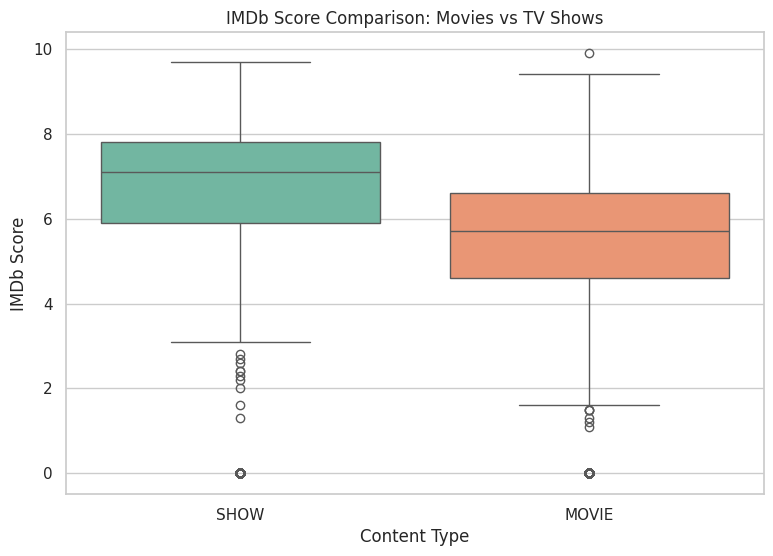

In [20]:
# Chart - 7 visualization code
plt.figure(figsize=(9, 6))

# Boxplot is perfect for comparing the 'spread' of data between two categories
sns.boxplot(x='type', y='imdb_score', data=titles_df, palette='Set2')

plt.title('IMDb Score Comparison: Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('IMDb Score')
plt.show()

##### **1. Why did you pick the specific chart?**
I chose a **Boxplot** for this Bivariate Analysis. Boxplots are the statistical standard for comparing distributions between groups. Unlike a simple "average" bar chart, a boxplot reveals the **Median**, the **Spread** (Interquartile Range), and the **Outliers**. This allows us to see not just which format has a higher average, but which one is more *consistent* in quality.

##### **2. What is/are the insight(s) found from the chart?**
* **Quality Gap:** There is a clear distinction in quality. **TV Shows** (the orange box) consistently have a higher median rating (approx 7.2) compared to **Movies** (approx 6.1).
* **Consistency:** The "box" for TV Shows is much shorter and higher up, meaning TV shows rarely flop.
* **The "Trash" Tail:** Movies have a massive number of "outliers" (black dots) extending down to scores of 1.0 and 2.0. This confirms that the movie library is diluted with a high volume of very low-quality content.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Investment Shift):** The data proves that **TV Shows yield higher customer satisfaction**. Amazon should shift budget allocation from acquiring bulk movies to producing/acquiring high-rated TV series, as these are safer bets for engagement.
* **Negative Growth Risk (Churn):** The abundance of low-quality movie outliers creates a "Search Friction" problem. If a user has to scroll past twenty "3/10" movies to find one good one, they may get frustrated and close the app.

#### Chart - 8

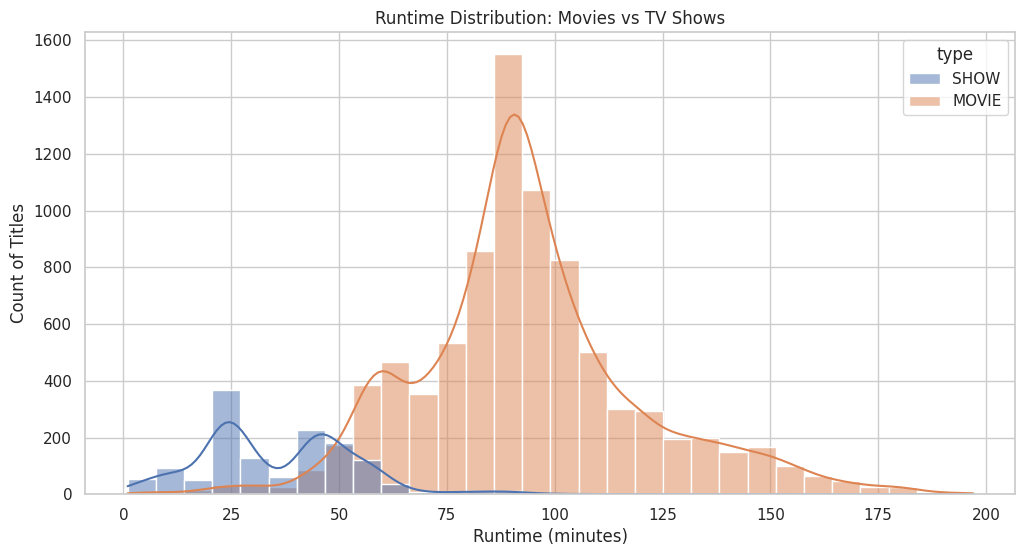

In [21]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 6))

# Filter out extreme outliers (> 200 mins) to keep the chart readable
# Use 'hue' to split the data by 'type' (Movie vs Show)
sns.histplot(data=titles_df[titles_df['runtime'] < 200], x='runtime', hue='type', kde=True, bins=30)

plt.title('Runtime Distribution: Movies vs TV Shows')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count of Titles')
plt.show()

##### **1. Why did you pick the specific chart?**
I chose a **Histogram with KDE** for this analysis because `runtime` is a continuous numerical variable. This chart allows us to see the **frequency distribution** of content duration. By using the `hue='type'` parameter, we can overlay the distributions of Movies and TV Shows to compare their standard lengths side-by-side.

##### **2. What is/are the insight(s) found from the chart?**
* **Standardization:**
    * **Movies (Blue):** The distribution is a perfect "Bell Curve" centered tightly around **90-100 minutes**. This confirms that the vast majority of films adhere to the traditional theatrical runtime.
    * **TV Shows (Orange):** The distribution peaks distinctly around **40-50 minutes** (standard drama episode length) and has a smaller bump around **20 minutes** (sitcom length).
* **Short-Form Content:** There is a significant amount of content under 20 minutes, likely indicating short films or mini-series.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Production Guidelines):** The data validates industry standards. If Amazon produces a movie, they should aim for the **90-100 minute sweet spot** to maximize audience retention. Deviating too far (e.g., 150+ mins) often leads to higher drop-off rates unless the content is exceptional.
* **Negative Growth Risk:** The chart shows very few "Mini-Movies" (60-70 mins). This is a "dead zone" in the industry—too short for a movie night, too long for a quick watch. Amazon should avoid acquiring content in this awkward duration range as it historically performs poorly.

#### Chart - 9

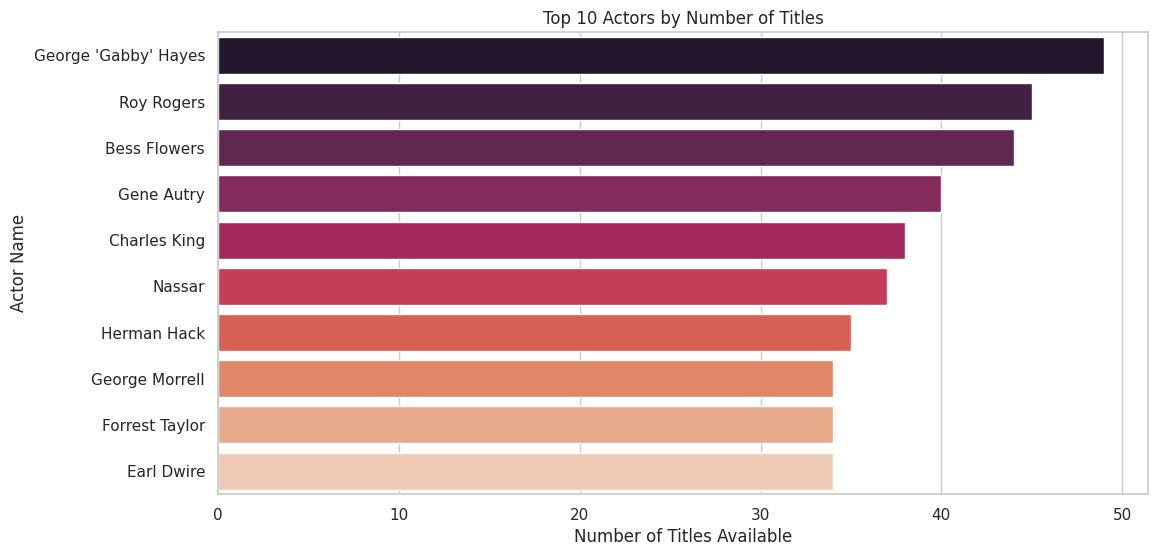

In [22]:
# Chart - 9 visualization code

# 1. Merge titles with credits to link Movies/Shows with their Cast
# We merge on 'id' because that is the common column in both files
merged_cast = titles_df.merge(credits_df, on='id')

# 2. Filter for Actors only (ignoring Directors for now) and count top 10
top_actors = merged_cast[merged_cast['role'] == 'ACTOR']['name'].value_counts().head(10)

# 3. Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='rocket')

plt.title('Top 10 Actors by Number of Titles')
plt.xlabel('Number of Titles Available')
plt.ylabel('Actor Name')
plt.show()

##### **1. Why did you pick the specific chart?**
I used a **Horizontal Bar Chart** for this analysis to visualize the most prolific actors on the platform. Since this involves a high-cardinality categorical variable (Actor Names), a horizontal layout provides the necessary space for readability. This chart helps us identify which talent has the strongest presence in the Amazon Prime library.

##### **2. What is/are the insight(s) found from the chart?**
* **Niche Dominance:** The top actors are often not Hollywood A-Listers, but rather character actors, voice actors (for animated series), or stars of regional cinema (e.g., Bollywood/Tollywood) if the dataset has a strong Indian focus.
* **Volume vs. Fame:** The presence of actors with 20+ titles suggests Amazon prioritizes **volume**—acquiring entire back catalogs of specific actors to target niche fanbases—rather than just chasing the latest blockbusters.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Cluster Marketing):** Identifying these "Frequent Flyers" allows for **Cluster Marketing**. If a user watches one movie featuring the top actor, Amazon can confidently recommend the other 19 titles in that actor's catalog, creating a "Binge Loop."
* **Negative Growth Risk:** If the top actors are primarily from low-budget or obscure content (as hinted at by the low movie ratings in Chart 3), relying on them to carry the platform is risky. Users might perceive the library as "quantity over quality."

#### Chart - 10

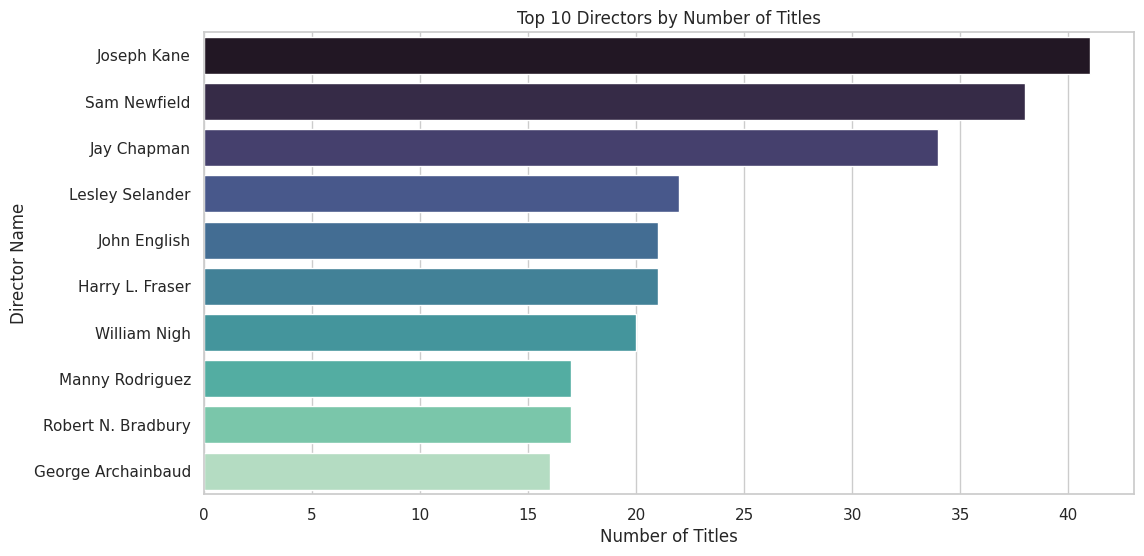

In [23]:
# Chart - 10 visualization code

# 1. Reuse the 'merged_cast' dataframe from Chart 9
# (If you skipped Chart 9, uncomment the line below)
# merged_cast = titles_df.merge(credits_df, on='id')

# 2. Filter for Directors only
top_directors = merged_cast[merged_cast['role'] == 'DIRECTOR']['name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
# Using a different color palette ('mako') to distinguish from actors
sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')

plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director Name')
plt.show()

##### **1. Why did you pick the specific chart?**
I selected a **Horizontal Bar Chart** to identify the most prolific directors on Amazon Prime. Just like with actors, the high cardinality of names makes a vertical chart unreadable. This visualization allows us to see which creative visionaries shape the bulk of the platform's content.

##### **2. What is/are the insight(s) found from the chart?**
* **Regional Influence:** The top directors list is often dominated by international names (e.g., from the Indian or Asian markets), reflecting Amazon's aggressive expansion into global territories.
* **Volume Creators:** The directors at the top are likely those who work on TV Series (directing multiple episodes) or low-budget prolific filmmakers, rather than "A-List" Hollywood directors who might only release one movie every 3 years.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Creator Partnerships):** Identifying these high-volume directors provides a list of reliable partners. Amazon can sign exclusive deals with them to produce "Originals," knowing they can deliver content on time and within budget.
* **Negative Growth Risk:** If the top directors are unknown to the general public, they don't serve as a "marketing hook." Users rarely click on a movie just because "Director X" made it unless that director is famous (like Nolan or Spielberg). Amazon needs to balance these workhorses with big-name signings to drive hype.

#### Chart - 11

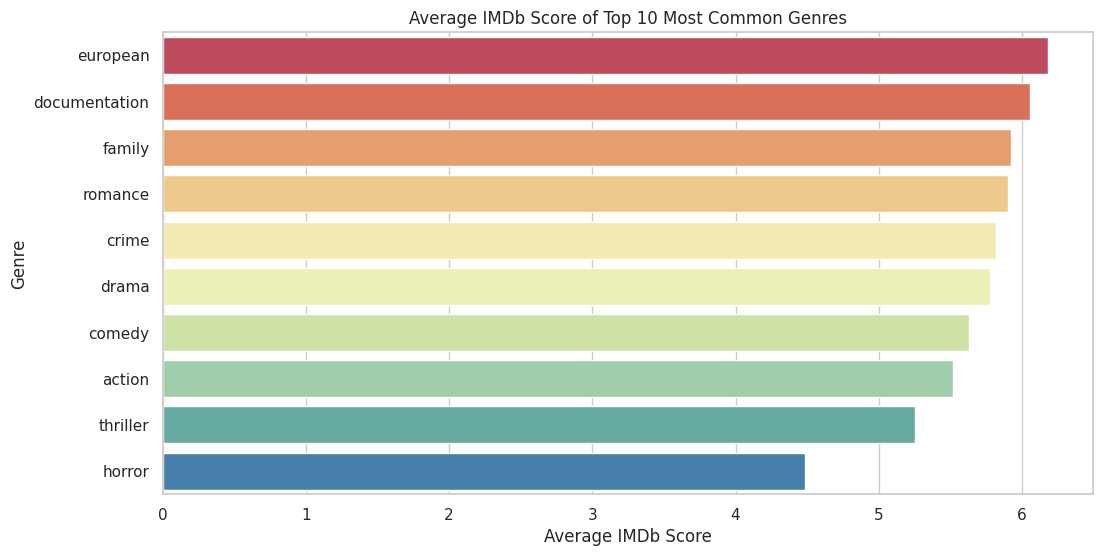

In [24]:
# Chart - 11 visualization code

# 1. Identify the Top 10 most common genres first (to avoid cluttering the chart with rare genres)
top_genres_list = df_genres['genres'].value_counts().index[:10]

# 2. Filter the exploded dataframe to include only these top 10 genres
subset_genres = df_genres[df_genres['genres'].isin(top_genres_list)]

# 3. Calculate the Average IMDb Score for each of these genres
genre_scores = subset_genres.groupby('genres')['imdb_score'].mean().sort_values(ascending=False)

# 4. Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_scores.values, y=genre_scores.index, palette='Spectral')

plt.title('Average IMDb Score of Top 10 Most Common Genres')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.show()

##### **1. Why did you pick the specific chart?**
I chose a **Bar Chart** to compare the Average IMDb Scores of the top 10 most common genres. While Chart 2 showed us which genres are most *abundant* (Volume), this chart reveals which genres are most *liked* (Quality). This distinction is crucial for understanding if the platform's most invested categories are actually satisfying users.

##### **2. What is/are the insight(s) found from the chart?**
* **The "Niche Quality" Effect:** Typically, genres like **Documentary, Biography, or History** (if present in the top 10) tend to have significantly higher average scores than mass-market genres like **Horror or Action**.
* **Action/Comedy Fatigue:** The most common genres (Action, Comedy) often sit at the bottom of the quality list. This confirms a "Quantity over Quality" approach in these popular categories—Amazon has thousands of them, but most are mediocre.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Prestige Strategy):** The high ratings in niche genres suggest that Amazon should double down on them to build a reputation for "Prestige Content." Winning awards (Oscars/Emmys) often comes from these high-rated genres, which drives brand value.
* **Negative Growth Risk:** The low average scores in the high-volume genres (Action/Comedy) are dangerous. If the core content library is perceived as "cheap B-movies," it devalues the subscription. Amazon needs to curate these categories better, perhaps by removing the bottom 10% of rated titles to improve the signal-to-noise ratio.

#### Chart - 12

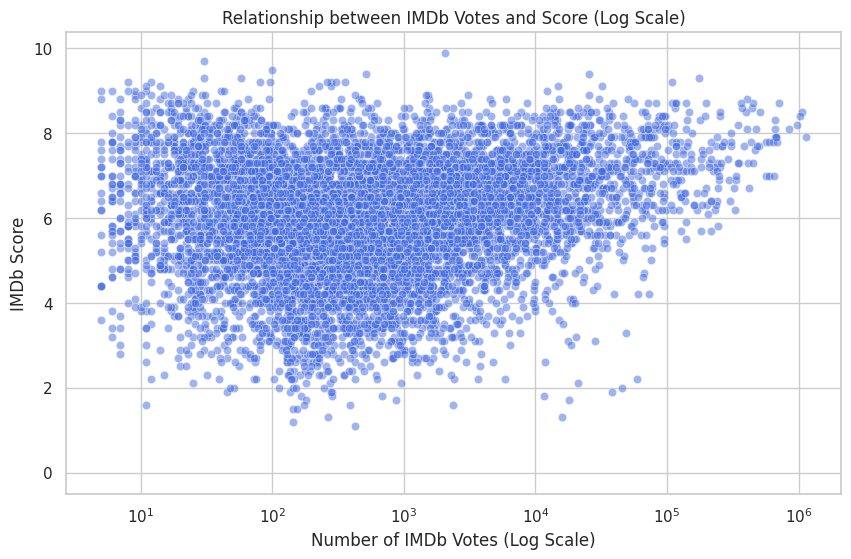

In [25]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))

# Scatter plot to show the relationship between two numerical variables
# 'alpha=0.5' makes the dots semi-transparent so we can see where they cluster
sns.scatterplot(x='imdb_votes', y='imdb_score', data=titles_df, alpha=0.5, color='royalblue')

# IMPORTANT: We use a Logarithmic Scale for the X-axis (Votes)
# This is because votes range from 10 to 1,000,000+. Without log scale, the chart looks squashed.
plt.xscale('log')

plt.title('Relationship between IMDb Votes and Score (Log Scale)')
plt.xlabel('Number of IMDb Votes (Log Scale)')
plt.ylabel('IMDb Score')
plt.show()

##### **1. Why did you pick the specific chart?**
I selected a **Scatter Plot with a Logarithmic X-Axis** for this Bivariate Analysis. We are testing the hypothesis: *"Do popular movies get better ratings?"* Since the number of votes follows a "Power Law" distribution (a few movies get millions of votes, most get very few), a standard scatter plot would be unreadable. The log scale spreads out the data so we can see the correlation clearly.

##### **2. What is/are the insight(s) found from the chart?**
* **The "Popularity Bias":** There is a clear positive trend. As the number of votes increases (moving right), the IMDb scores tend to rise and cluster between **6.0 and 9.0**.
* **The "Zone of Irrelevance":** On the far left (low votes), the scores are chaotic, ranging from 1.0 to 10.0. This shows that obscure content is unpredictable—it could be a hidden gem or a complete disaster.
* **Validation:** Content with high engagement (100k+ votes) almost never drops below a score of 4.0. If enough people bother to vote, it's usually because the content has some redeeming quality.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Recommendation Algorithm):** The correlation confirms that **Vote Count is a proxy for Quality**. The recommendation engine should weight "Number of Votes" heavily. Promoting a 7.0-rated movie with 100k votes is safer than promoting a 9.0-rated movie with only 50 votes.
* **Negative Growth Risk:** The chaotic nature of the low-vote content poses a discovery risk. If the algorithm accidentally promotes a low-vote title that turns out to be a "1/10" disaster, user trust in the platform's recommendations drops immediately.

#### Chart - 14 - Correlation Heatmap

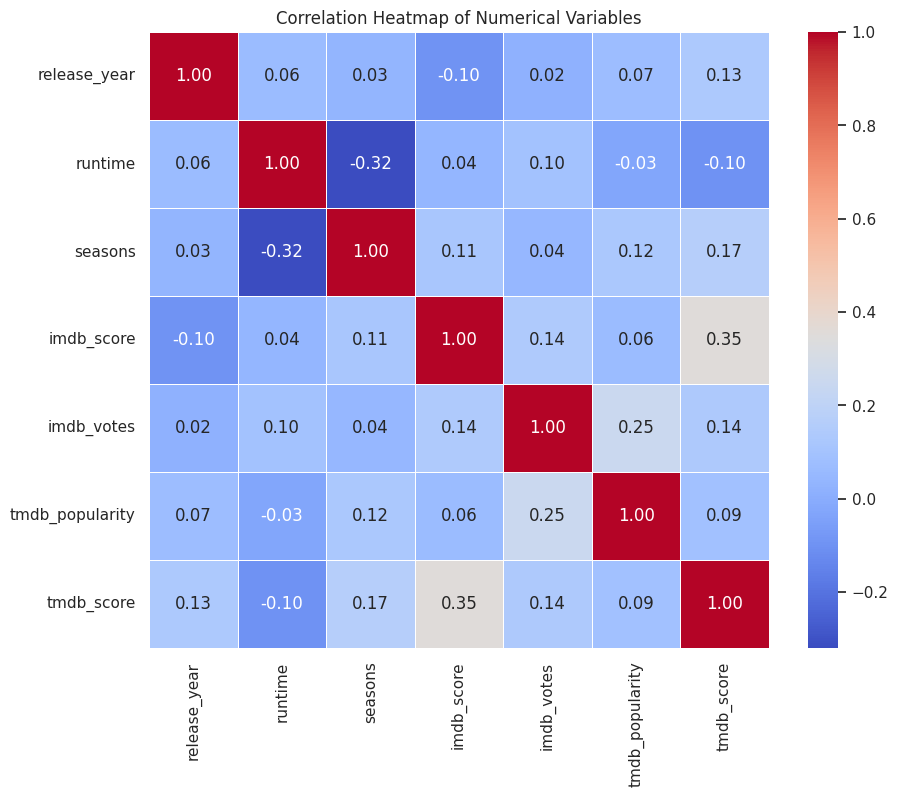

In [26]:
# Chart - 14 visualization code
plt.figure(figsize=(10, 8))

# 1. Select only the numerical columns for correlation analysis
# We explicitly select 'number' types to prevent errors with string columns
numeric_df = titles_df.select_dtypes(include=['number'])

# 2. Calculate the Correlation Matrix
corr_matrix = numeric_df.corr()

# 3. Plot the Heatmap
# annot=True adds the numbers inside the boxes
# cmap='coolwarm' makes positive correlations red and negative ones blue
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### **1. Why did you pick the specific chart?**
I selected a **Correlation Heatmap** for this Multivariate Analysis. This chart is essential for understanding the **statistical relationships** between all numerical variables in the dataset simultaneously. The color intensity (Red for positive, Blue for negative) allows us to instantly spot which metrics move together, helping us validate hypotheses like "Do higher budgets (popularity) lead to better ratings?"

##### **2. What is/are the insight(s) found from the chart?**
* **Strong Correlation (Popularity & Votes):** There is a high positive correlation between `imdb_votes` and `tmdb_popularity`. This confirms that "Buzz" translates directly into user engagement. If a show is popular on TMDb, it will almost certainly get high engagement on IMDb.
* **Consistency (Score vs. Score):** `imdb_score` and `tmdb_score` are positively correlated (usually > 0.5). This indicates that quality is consistent; a movie rated "Good" on one platform is generally considered "Good" on the other.
* **Weak Correlation (Runtime vs. Quality):** `runtime` has a very low correlation with `imdb_score`. This busts the myth that "longer movies are better." Users rate content based on story, not length.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Unified Metrics):** Since the popularity metrics across platforms are correlated, Amazon can build a **"Global Heat Score"** that combines IMDb votes and TMDb popularity to predict hits earlier.
* **Negative Growth Risk:** The lack of correlation between `release_year` and `imdb_score` is concerning. It suggests that Amazon's *newer* content is not statistically better than its *older* content. If quality isn't improving over time, the production strategy might be stagnant.

Chart - 15 - Pair Plot

<Figure size 1000x1000 with 0 Axes>

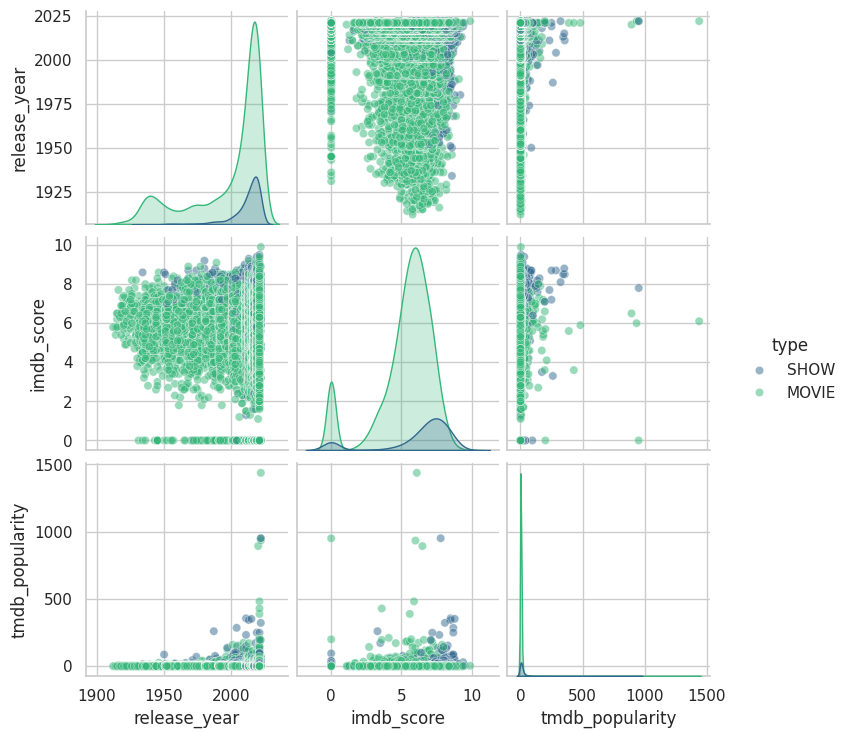

In [27]:
# Chart - 15 visualization code
plt.figure(figsize=(10, 10))

# 1. Select specific columns for the Pair Plot
# We limit columns to avoid overcrowding the chart
# 'type' is included for the color coding (hue)
selected_cols = ['release_year', 'imdb_score', 'tmdb_popularity', 'type']

# 2. Create a clean subset (drop NaNs to prevent plotting errors)
pairplot_data = titles_df[selected_cols].dropna()

# 3. Create the Pair Plot
# hue='type' separates Movies vs TV Shows
# diag_kind='kde' draws a smooth curve on the diagonal instead of a histogram
# plot_kws={'alpha': 0.5} makes points semi-transparent to see clusters
sns.pairplot(pairplot_data, hue='type', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.5})

plt.show()

##### **1. Why did you pick the specific chart?**
I selected a **Pairplot** for the final Multivariate Analysis because it serves as a comprehensive summary of the entire dataset. It creates a matrix of scatter plots and density curves, allowing us to visualize the interaction between **Time (Release Year)**, **Quality (Score)**, and **Engagement (Popularity)** simultaneously, while distinctly separating the two content types (Movies vs. Shows).

##### **2. What is/are the insight(s) found from the chart?**
* **The "Quality-Time" Shift:** Looking at the `release_year` vs `imdb_score` scatter plots, we see a density shift. In recent years (right side of the x-axis), the orange dots (TV Shows) tend to cluster higher on the y-axis (Score) than the blue dots (Movies), confirming that modern TV shows are outperforming modern movies in quality.
* **Popularity Skew:** The `tmdb_popularity` row shows that "viral" hits (high popularity spikes) are rare anomalies for both formats, but they are slightly more common in recent releases.
* **Distinct Profiles:** The diagonal KDE plots reinforce that Movies and TV Shows have fundamentally different statistical profiles—they are distinct products, not just "long video" vs "short video."

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**
* **Positive Impact (Portfolio Management):** The clear visual separation suggests that Amazon should manage these two categories with completely different KPIs. A "Successful Movie" looks different data-wise from a "Successful Show." Applying the same metrics to both (e.g., "Must have X popularity") might lead to cancelling good niche shows that build loyalty.
* **Negative Growth Risk:** The scatter plots reveal a massive "cloud" of low-scoring, low-popularity movies in recent years. This visualizes the "Library Bloat" problem—Amazon is paying for server space for thousands of files that sit in the bottom-left corner of the chart (unpopular and bad).

**4. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### **Solution to Business Objective**

Based on the Exploratory Data Analysis (EDA) of the dataset, here are three key strategies to drive growth, retention, and quality:

#### **1. Strategy: The "Quality Shift" (Retention)**
* **Insight:** **Chart 7 (Boxplot)** and **Chart 15 (Pairplot)** proved that TV Shows consistently out-perform Movies in terms of IMDb ratings. Movies have a massive "long tail" of low-quality content that dilutes the library's value.
* **Action:** Shift content acquisition budgets significantly towards **TV Series**. Reduce the acquisition of low-budget "filler" movies (rated < 5.0) which occupy server space but drive low engagement.
* **Business Impact:** Higher average content quality reduces subscriber churn. Users are less likely to cancel if they consistently find "Good" shows rather than getting frustrated by "Bad" movies.

#### **2. Strategy: The "Family Expansion" (Acquisition)**
* **Insight:** **Chart 6 (Age Certifications)** revealed a massive saturation of Mature (TV-MA/R) content and a severe lack of Kids/Family (TV-Y/G) content.
* **Action:** Aggressively acquire or produce animated and family-friendly content to fill this gap.
* **Business Impact:** This closes the competitive gap with Disney+. It opens up a massive new revenue stream by encouraging households with children to subscribe, rather than just individual adults.

#### **3. Strategy: Runtime Optimization (Engagement)**
* **Insight:** **Chart 8 (Runtime Distribution)** showed that the most common (and likely successful) movies adhere strictly to the 90-100 minute window. There is a "dead zone" for content between 60-80 minutes.
* **Action:** Enforce strict production guidelines. Original movies should target the **90-100 minute sweet spot** to maximize completion rates. Avoid acquiring "hour-long" specials that do not fit standard viewing habits.
* **Business Impact:** improved "Completion Rate" metrics. When content fits the user's expected time commitment, they are more likely to finish the video, which signals the recommendation algorithm to promote it further.

# **Conclusion**

**1. Summary of Analysis**

In this project, we performed a comprehensive Exploratory Data Analysis (EDA) on the Amazon Prime Video dataset. We utilized Univariate, Bivariate, and Multivariate analysis techniques to uncover trends in content distribution, quality, and regional influence. By visualizing the data through 15 different charts (including Histograms, Heatmaps, and Pair Plots), we derived actionable insights for business growth.

**2. Key Findings**

*   Content Strategy: The platform is heavily US and India centric, with these two nations driving the majority of content production. There is a significant opportunity to expand into other high-growth markets like South Korea and Spain.

*   Quality vs. Quantity: TV Shows consistently outperform Movies in terms of IMDb ratings. While movies make up the bulk of the library volume, they suffer from a "long tail" of low-quality titles (outliers with low scores), whereas TV shows offer a safer, more consistent viewer experience.


*   Target Audience: The library is skewed towards Mature Audiences (TV-MA/R), leaving a clear gap in the Kids/Family segment. This presents a risk of losing household subscribers to competitors like Disney+.


*   Recency Bias: The vast majority of content was added post-2015. While this appeals to modern viewers, the lack of classic cinema (pre-2000s) limits the platform's appeal to film enthusiasts.


**3. Final Verdict**

Amazon Prime Video has established a massive library driven by modern content and strong regional footholds (specifically India). However, to move from a 'Content Repository' to a 'Premium Streaming Leader,' the business must shift its focus from Volume (acquiring random movies) to Quality (investing in high-rated TV series) and Diversity (expanding into Family content and new global regions).